Import Modules

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Data Collection & Pre-Processing

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# loading the data from csv file to a pandas DataFrame
mail_data = pd.read_csv('/content/mail_data.csv')

In [ ]:
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove special characters, stop words, and punctuation
    tokens = [word for word in tokens if (word.isalnum() and word not in set(stopwords.words('english')) and word not in set(string.punctuation))]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
# Apply the preprocessing function to each message in the 'Message' column
mail_data['Processed_Message'] = mail_data['Message'].apply(preprocess_text)

# Display the first few rows of the preprocessed data
print("\nPreprocessed Mail Data:")
print(mail_data.head())


Preprocessed Mail Data:
  Category                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                   Processed_Message  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4               nah think goe usf live around though  


In [ ]:
# Checking the number of rows and columns in the preprocessed DataFrame
print("\nShape of Preprocessed Mail Data:", mail_data.shape)


Shape of Preprocessed Mail Data: (5572, 3)


In [ ]:
# WordCloud Initialization
wc = WordCloud(width=600, height=400, min_font_size=10, background_color='white')

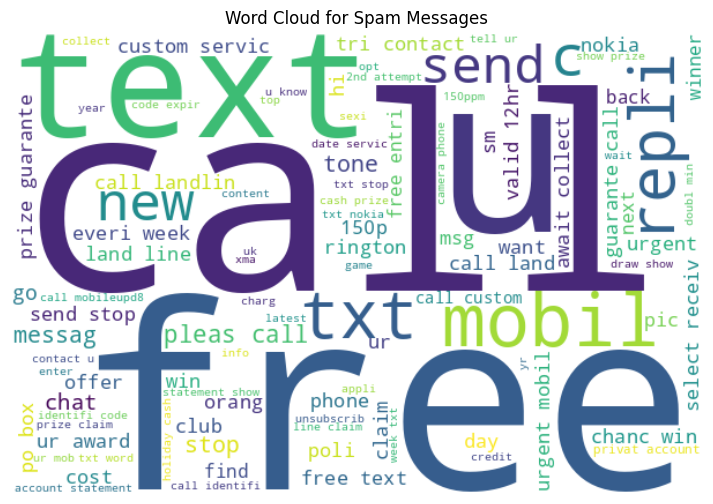

In [ ]:
# Generate WordCloud for Spam Messages
spam_wc = wc.generate(mail_data[mail_data['Category'] == 'spam']['Processed_Message'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

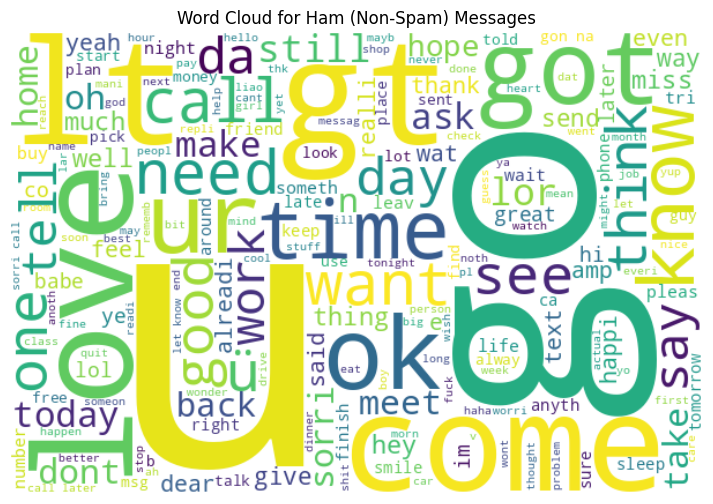

In [ ]:
# Generate WordCloud for Ham (Non-Spam) Messages
ham_wc = wc.generate(mail_data[mail_data['Category'] == 'ham']['Processed_Message'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Word Cloud for Ham (Non-Spam) Messages')
plt.axis('off')
plt.show()

Label Encoding (Spam - 0 & Ham - 1)

In [ ]:
# Label Encoding (Spam - 0 & Ham - 1)
mail_data['Category'] = mail_data['Category'].map({'spam': 0, 'ham': 1})


In [ ]:
# Separating the data as texts and labels
X = mail_data['Processed_Message']
Y = mail_data['Category']

In [ ]:
print(X)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Processed_Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64


Data Split - Training Data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [ ]:
# Transform the training data
X_train_features = feature_extraction.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_features = feature_extraction.transform(X_test)

In [ ]:
# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
# display X_train
print(X_train)

3075                                      know msg recent
1787    know god creat gap finger one made come amp fi...
1614                                thnx dude u guy 2nite
4304                                             yup free
3266    44 7732584351 want new nokia 3510i colour phon...
                              ...                        
789     5 free top polyphon tone call 087018728737 nat...
968     u want come back beauti necklac token heart gi...
1667           guess spent last night phase fourth dimens
3321    eh sorri leh din c ur msg sad alreadi lar watc...
1688       free top rington weekli 1st week subpoli 3 per
Name: Processed_Message, Length: 4457, dtype: object


In [ ]:
print(X_train_features)

  (0, 4311)	0.7330307910697687
  (0, 3546)	0.5307583044549106
  (0, 3050)	0.4253956765127941
  (1, 3251)	0.1811926576103947
  (1, 2543)	0.2774285983202663
  (1, 2649)	0.27056518886677744
  (1, 731)	0.22784381922800512
  (1, 1470)	0.16891641563456966
  (1, 2194)	0.3214107017709665
  (1, 2346)	0.6582208096337824
  (1, 1582)	0.3291104048168912
  (1, 2418)	0.2494167241571373
  (1, 3050)	0.17166734258009794
  (2, 314)	0.5158182093511575
  (2, 2514)	0.3881579360881621
  (2, 1900)	0.4548895492410612
  (2, 5239)	0.6134659644550853
  (3, 2280)	0.5869294577568266
  (3, 5894)	0.8096380744612234
  (4, 36)	0.2390213472170764
  (4, 4366)	0.15593131315993386
  (4, 1258)	0.24256837144468807
  (4, 5190)	0.14423894342879587
  (4, 205)	0.22537112395334827
  (4, 3494)	0.16083678767553045
  :	:
  (4453, 1470)	0.3933344110746713
  (4454, 1778)	0.4728161846815466
  (4454, 2267)	0.4728161846815466
  (4454, 3971)	0.4728161846815466
  (4454, 4873)	0.3975562001248363
  (4454, 3662)	0.2655579149001037
  (4454, 25

Model Training - Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Model Evaluation

In [ ]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9636526811756787


In [ ]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9659192825112107


Classifer - Predictive System

In [ ]:
#input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_mail = ["win this special offer for free free"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail
